In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

## Load Our Dataset

In [3]:
df = pd.read_csv('data/berat_tinggi.csv')
df.head(3)

,tinggi,berat,deskripsi
0,158.114332,58.364240,Normal
1,160.344026,52.560155,Normal
2,161.486080,61.934852,Normal


<AxesSubplot:xlabel='berat', ylabel='tinggi'>

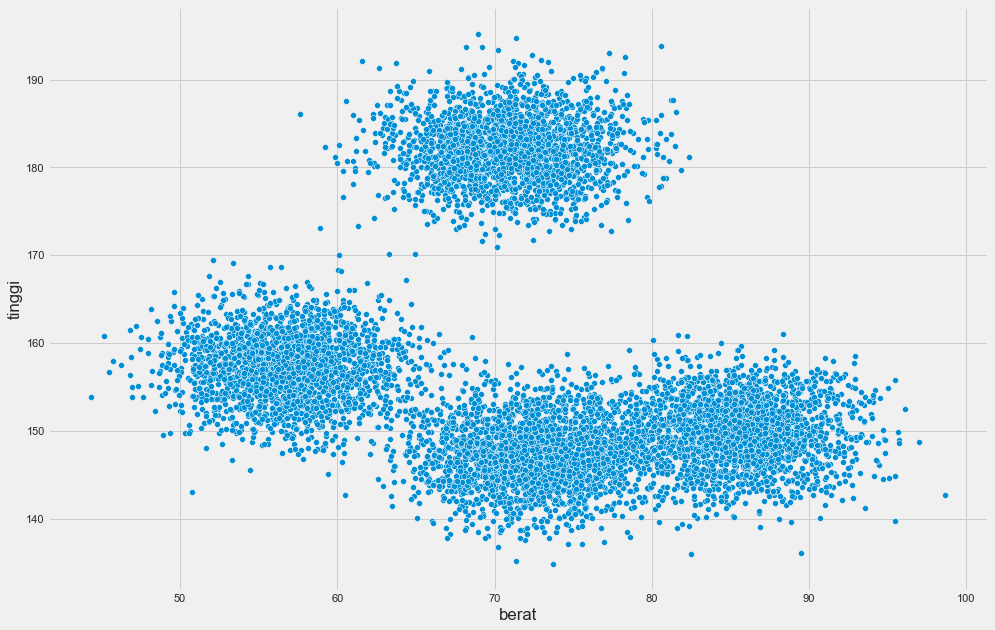

In [4]:
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(data=df, x='berat', y='tinggi')

## Standarisasi Fitur

In [5]:
feats = ['berat', 'tinggi']
X = df[feats].values
y = df['deskripsi'].values

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
new_df = pd.DataFrame(data = X_std, columns = feats)
new_df.describe()

,berat,tinggi
count,8.888000e+03,8.888000e+03
mean,-9.445390e-16,-1.882882e-15
std,1.000056e+00,1.000056e+00
min,-2.518583e+00,-1.700451e+00
25%,-7.278008e-01,-7.436739e-01
50%,3.573103e-02,-3.731224e-01
75%,7.119833e-01,7.883579e-01
max,2.542716e+00,2.532521e+00


## Clustering

### Lakukan Agglomerative Clustering

In [6]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=4)
ac.fit(new_df.values)

AgglomerativeClustering(n_clusters=4)

### Bandingkan hasil dengan target

In [7]:
df['target'] = y

In [8]:
df['cluster'] = ac.labels_

<AxesSubplot:xlabel='berat', ylabel='tinggi'>

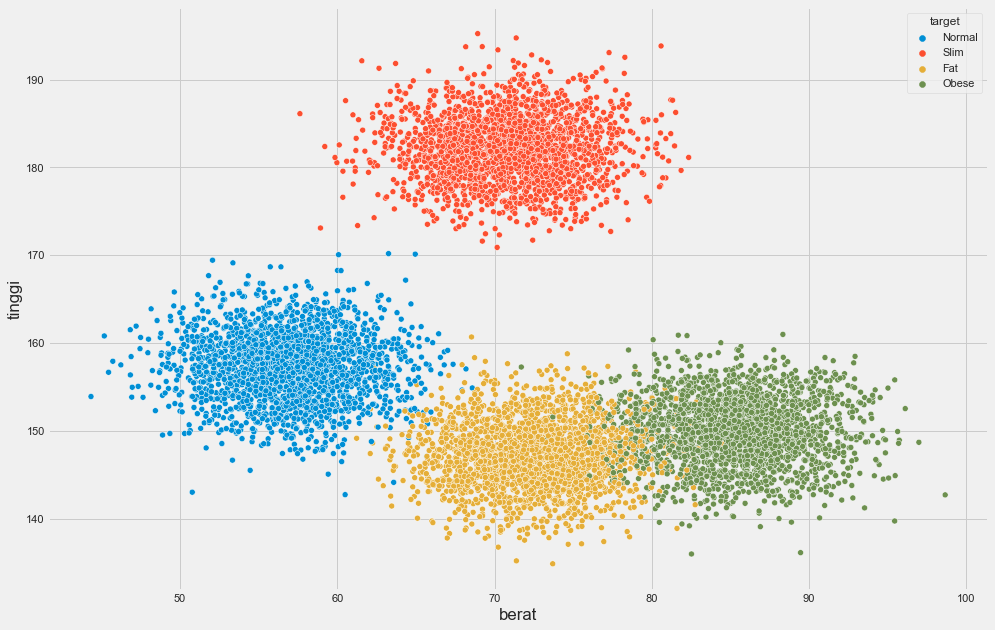

In [9]:
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(data=df, x='berat', y='tinggi', 
                hue='target')

<AxesSubplot:xlabel='berat', ylabel='tinggi'>

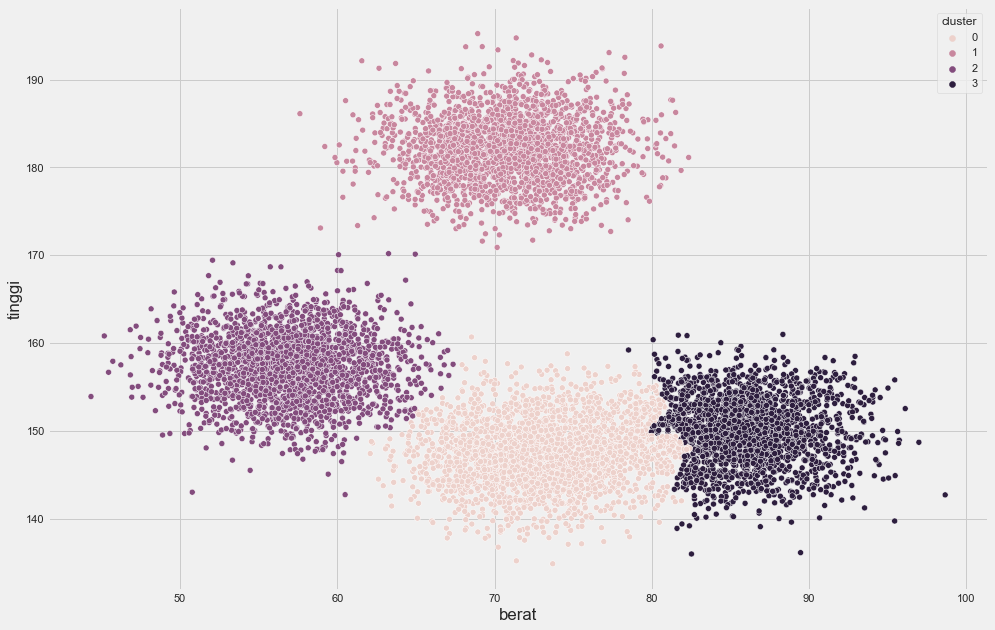

In [12]:
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(data=df, x='berat', y='tinggi', 
                hue='cluster')